# K-Means Clustering

## Import all dependencies

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import cm
import pickle, os, json
import pandas as pd
import numpy as np
import collections
import pickle
import os

## Fetch datasets

In [19]:
dataset = pd.read_csv(os.path.join("../web_application/data/output/datasets.csv"))
dataset.head()

,Program Enrolled,Age,Year Level,Gender,Level of Education Graduated before College,Student Interest/Motivation in joining the Course,Resolving Programming Issues,Factors that may affect the learning experiences,Teaching Methods,[C++ Programming Language],[Java Programming Language],[Information Management],[Object Oriented Programming],[Python Programming Language],[Learning MySQL (Database)],[Web Development (HTML & CSS)]
0,1,0,3,1,1,5,3,1,1,4,4,4,4,4,4,4
1,1,21,4,1,1,1,1,1,1,1,1,2,2,2,2,2
2,2,21,4,1,1,3,4,3,2,2,2,2,2,2,2,2
3,2,21,4,2,1,2,5,2,3,2,2,2,2,2,2,2
4,2,21,4,4,1,1,1,4,1,3,2,2,2,2,2,2


#### Get Shape of Dataset

In [20]:
dataset.shape

(249, 16)

We have **306** observations (students) with **16** features (11 survey questions and 5 attributes).

In [21]:
X_questions = dataset.iloc[:,5:16]
question_means = X_questions.mean(axis = 0)
grand_mean = question_means.mean()
std_by_questions = question_means.std()
print('Grand Mean: \t\t', grand_mean)
print('Standard Deviation: \t', std_by_questions)

Grand Mean: 		 2.2117561153705734
Standard Deviation: 	 0.23218333526085586


### Data Preparation

_People tend to prefer explained variance ≥ 90%_

In [22]:
pca = PCA(n_components = 2, random_state=1)
X_pca = pca.fit_transform(dataset)
pca.explained_variance_ratio_.cumsum()[1]

0.722167326633513

## Running K-Means with a range of k

Our output will be the `yield` property and we will get the 30% of the data to be the test data. 

In [13]:
distortions = []
K = range(1,10)
for i in K:
    model = KMeans(
            n_clusters=i,
            random_state=1)
    model.fit(X_pca)
    distortions.append(model.inertia_)

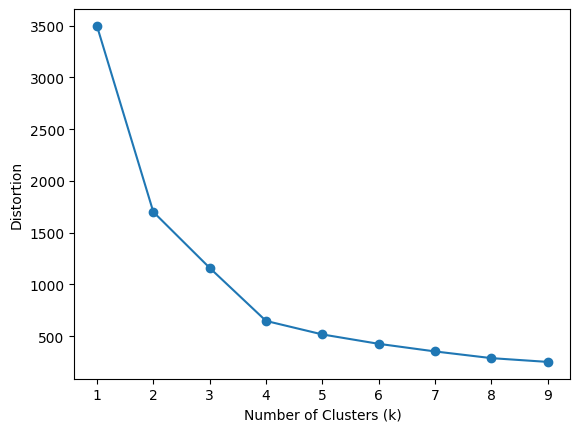

In [7]:
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## Plotting the distortions of K-Means

#### We can observe that the “elbow” is the number 4 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 4.

In [23]:
model = pickle.load(open(os.path.join('..', 'web_application', 'data', 'model', 'model.pkl'), 'rb'))
y = model.predict(X_pca)
print(X_pca)
print(y)

[[ 2.12024904e+01  1.15491767e+00]
 [-1.91962523e-01 -2.83732045e+00]
 [-3.72001309e-02  1.36860875e+00]
 [-6.87034379e-02  1.27341271e+00]
 [-4.56704631e-02 -1.35358238e+00]
 [-7.01009339e+00 -1.29529817e+00]
 [-7.86076326e-03  1.23576757e+00]
 [ 8.72460242e-01  1.99583867e-01]
 [-8.09349951e+00 -1.34868538e-01]
 [-1.10199620e+00 -2.20589172e+00]
 [-1.13268312e+00  3.89283315e-01]
 [-1.15131835e+00 -2.13200951e+00]
 [-6.46658856e-02 -2.24634671e+00]
 [ 2.09580982e+01 -5.29438141e-01]
 [-1.41453190e-01 -1.43945844e+00]
 [ 9.30005374e-01 -1.08430034e+00]
 [ 1.05376450e+00  3.03750831e+00]
 [-3.02710776e-03  1.22712742e+00]
 [-2.08470973e+00 -1.92280351e+00]
 [-2.05189710e+00  6.91853561e-01]
 [-1.98428343e+00  1.69822114e+00]
 [-1.01283280e+00  1.73785241e+00]
 [-5.35004578e-02 -5.02200891e-01]
 [ 8.32675691e-02  3.28025200e+00]
 [-1.03009634e+00 -1.04234592e+00]
 [-1.12316169e+00 -2.65243555e+00]
 [-2.18755232e+00 -7.05497993e-01]
 [-8.28759155e-02 -8.89770257e-01]
 [-1.21147412e-01 -8

## K-Means vs Actual for n_clusters=4

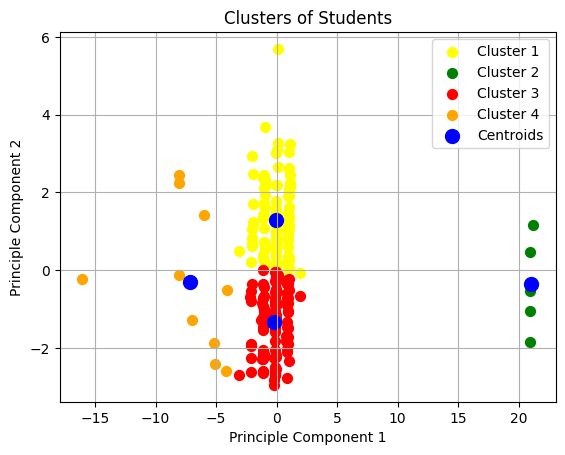

In [24]:
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], s = 50, c = 'orange', label = 'Cluster 4')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of Students')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()


### Result

In [10]:
print('K Means Result : ')
print(collections.Counter(y))

K Means Result : 
Counter({2: 155, 3: 135, 0: 12, 1: 4})


Silhouette Average:  0.4253850812314909


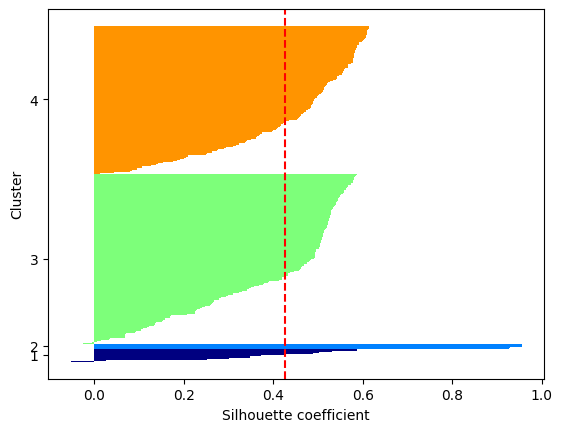

In [11]:
cluster_labels = np.unique(y)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
print('Silhouette Average: ', silhouette_avg)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

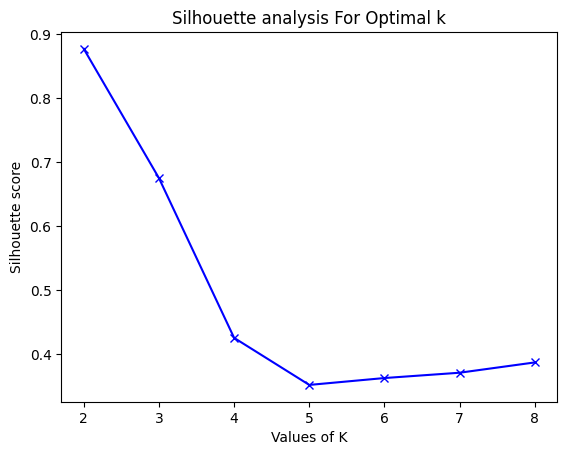

In [12]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X_pca, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

## Export Model

In [13]:
pickle.dump(model, open('model.pkl', 'wb'))